In [1]:
import Diagrams.Backend.Cairo.CmdLine

In [2]:
{-# LANGUAGE NoMonomorphismRestriction FlexibleContexts TypeFamilies #-}
import Diagrams.Prelude

A $0$-pentaflake is just a regular pentagon:



In [3]:
grad = defaultRG & _RG . rGradStops .~ mkStops [(blue,0,1), (crimson,1,1)]
                 & _RG . rGradRadius1 .~ 50

An [$n$-pentaflake](http://mathworld.wolfram.com/Pentaflake.html)
is an $(n-1)$-pentaflake surrounded by five more.  The `appends`
function is useful here for positioning the five pentaflakes around
the central one.



In [4]:
pentaflake' 0 = regPoly 5 1 # lw none

pentaflake' n = appends
                  pCenter
                  (zip vs (repeat (rotateBy (1/2) pOutside)))
  where vs = iterateN 5 (rotateBy (1/5))
           . (if odd n then negated else id)
           $ unitY
        pCenter  = pentaflake' (n-1)
        pOutside = pCenter # opacity (1.7 / fromIntegral n)

pentaflake n = pentaflake' n # fillTexture grad # bgFrame 4 silver

A $4$-pentaflake looks nice.  Of course there's an exponential
blowup in the number of primitives, so generating higher-order
pentaflakes can take a long time!



In [13]:
example = pentaflake 4

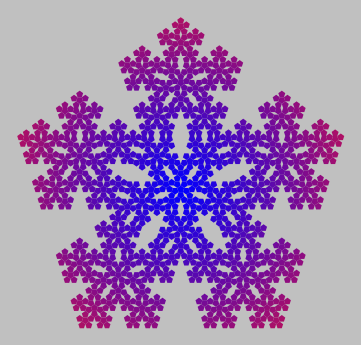

In [14]:
diagram example